In [34]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from utils.util import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Check pair txt distribution 

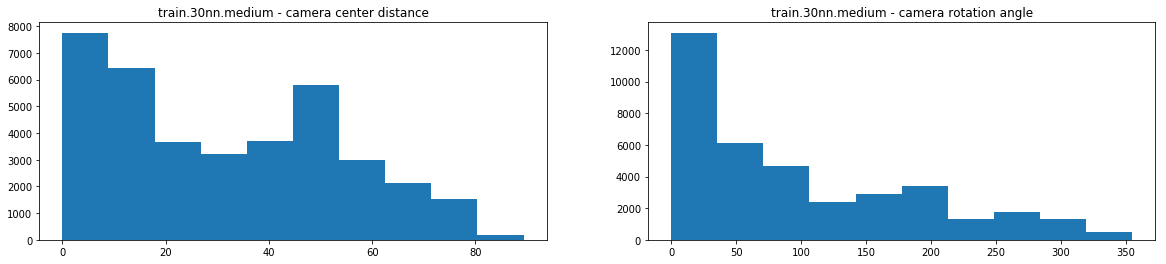

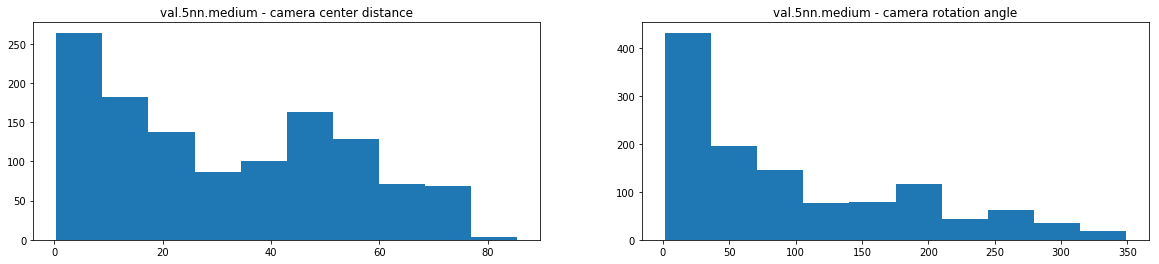

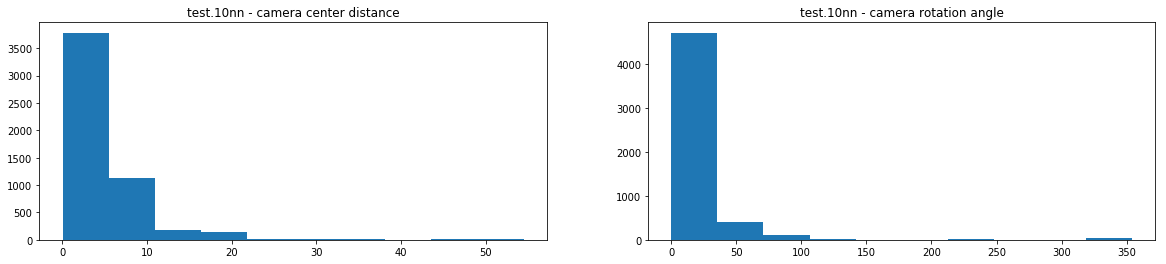

In [47]:
# Specify the dataset to inspect
base_dir = '/usr/stud/zhouq/Data/CambridgeLandmarks_256/StMarysChurch/'

# Load ground truth labels
abs_pose_set = {}
abs_pose_set.update(load_pose(os.path.join(base_dir, 'dataset_train.txt')))
abs_pose_set.update(load_pose(os.path.join(base_dir, 'dataset_test.txt')))

# Plot distribution
cam_dist, quat_ang = check_pair_distrb_txt(os.path.join(base_dir, 'train_pairs.30nn.medium.txt'), abs_pose_set)
plot_distrb(cam_dist, quat_ang, tag='train.30nn.medium')

cam_dist, quat_ang = check_pair_distrb_txt(os.path.join(base_dir, 'val_pairs.5nn.medium.txt'), abs_pose_set)
plot_distrb(cam_dist, quat_ang, tag='val.5nn.medium')

cam_dist, quat_ang = check_pair_distrb_txt(os.path.join(base_dir, 'test_pairs.10nn.unsampled.txt'), abs_pose_set)
plot_distrb(cam_dist, quat_ang, tag='test.10nn')

plt.show()   

## Check pair distribution on fly

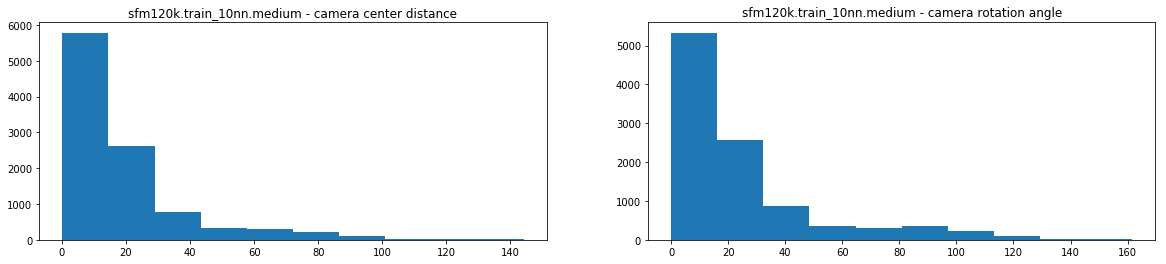

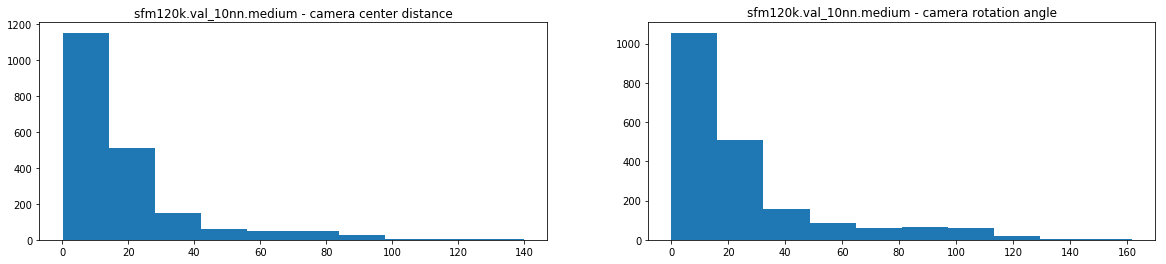

In [48]:
datasets = ['KingsCollege']#, 'ShopFacade', 'OldHospital', 'StMarysChurch']  
base_dir = '/usr/stud/zhouq/Data/CambridgeLandmarks_256'
npy_file = '../../cnnimageretrieval-pytorch/retreival_results/resnet101-gem/sfm120k-whiten/cambridge-train-val-step.npy'
K = 10

for dataset in datasets:
    rank_data = np.load(npy_file).item()[dataset]  
    train_txt = os.path.join(base_dir, dataset, 'train.step.txt')
    test_txt = os.path.join(base_dir, dataset, 'val.step.txt')
    
    sc = SampleSchema(case='outdoor', mode='medium')
    cam_dist, quat_ang = check_pair_distrb_npy(rank_data['train'], K, train_txt, train_txt, sc.sampler)
    plot_distrb(cam_dist, quat_ang, tag='sfm120k.train_{}nn.{}'.format(K, sc.mode))
    
    sc = SampleSchema(case='outdoor', mode='medium')
    cam_dist, quat_ang = check_pair_distrb_npy(rank_data['test'], K, train_txt, test_txt, sc.sampler)
    plot_distrb(cam_dist, quat_ang, tag='sfm120k.val_{}nn.{}'.format(K, sc.mode))